# 0.Introdução

A análise apresentada abaixo foi feita utilizando dados de vendas feitas pela marca Adidas no Estados Unidos, estes dados foram disponibilizados no site www.kaggle.com.

Nossa intenção através desta análise é aumentar o número de vendas da marca no país.
Para isto iremos analisar o histórico de vendas da loja em cada uma das regiões, e o produto que mais está saindo. Assim consequentemente aumentar as vendas e o lucro da marca.



# 1.Carregando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 2.Carregando DataSet

In [10]:
vendas=pd.read_excel('Adidasvendas.xlsx')
display(vendas)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [13]:
#Estruturas dos dados
vendas.info

<bound method DataFrame.info of          Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product  Price per Unit  Units Sold  \
0       New York

In [15]:
#Estrutura dos dados (colunas)
vendas.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [16]:
#Quantidade de linhas e colunas
vendas.shape

(9648, 13)

# 3.Análisando Vendas totais

In [50]:
faturamento_total=vendas['Total Sales'].sum()
print(faturamento_total)

899902125.0


O faturamento total da loja foi de R$ 899.902.125,00 doláres.


# 4.Análise de faturamento total por região

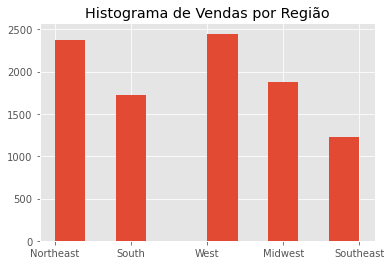

In [47]:
_=plt.hist(vendas.Region)
_=plt.title('Histograma de Vendas por Região')

Podemos observar que a loja Adidas teve um número significativo de vendas no Oeste.

In [43]:
faturamento_por_regiao= vendas[['Region', 'Total Sales']].groupby('Region').sum()
display(faturamento_por_regiao)

,Total Sales
Region,
Midwest,135800459.0
Northeast,186324067.0
South,144663181.0
Southeast,163171236.0
West,269943182.0


Acima conseguimos observar o valor total de vendas por região, quanto cada região vendeu em doláres no total.

# 5.Analisando detalhes para uma tomada de descisão

In [62]:
faturamento_por_produto= vendas[['Region','Product', 'Total Sales']].groupby(['Region','Product']).sum()
display(faturamento_por_produto)

Total Sales
Region    Product                               
Midwest   Men's Apparel               18125661.0
          Men's Athletic Footwear     21305539.0
          Men's Street Footwear       38322810.0
          Women's Apparel             28206383.0
          Women's Athletic Footwear   13595168.0
          Women's Street Footwear     16244898.0
Northeast Men's Apparel               25744412.0
          Men's Athletic Footwear     28874237.0
          Men's Street Footwear       51025024.0
          Women's Apparel             37543083.0
          Women's Athletic Footwear   19796138.0
          Women's Street Footwear     23341173.0
South     Men's Apparel               19703069.0
          Men's Athletic Footwear     25710545.0
          Men's Street Footwear       28444561.0
          Women's Apparel             29607187.0
          Women's Athletic Footwear   18420722.0
          Women's Street Footwear     22777097.0
Southeast Men's Apparel               24461487.0
          Men's Athletic Footwear     27777020.0
          Men's Street Footwear       36019236.0
          Women's Apparel             31491161.0
          Women's Athletic Footwear   20302798.0
          Women's Street Footwear     23119534.0
West      Men's Apparel               35694003.0
          Men's Athletic Footwear     50006339.0
          Men's Street Footwear       55014613.0
          Women's Apparel             52191046.0
          Women's Athletic Footwear   34517070.0
          Women's Street Footwear     42520111.0

Analisando a tabela acima podemos perceber que o produto mais vendido da marca são os calçados masculinos de rua (Men's Street Footwer). Uma solução para a melhoria de vendas da marca seria colocar mais estoque deste produto em todas as outras regiões, assim as lojas teriam um despache maior do produto e consequentemente geraria uma receita melhor de vendas para a marca.
